In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

Text(0.5, 1.0, 'Noisy Square Wave')

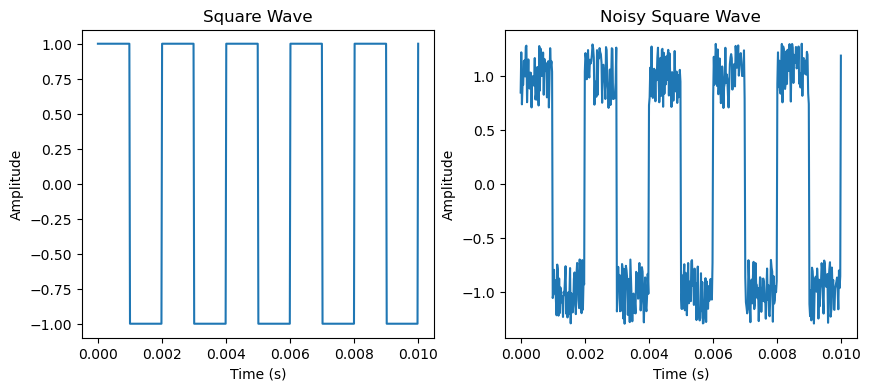

In [21]:
t = np.linspace(0, .01, 500) # 50000Hz sampling rate = 50k samples per second = 500 samples per 0.01s
square = signal.square(2 * np.pi * 500 * t)

noisquare = square + np.random.uniform(-.3,.3,500)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(t,square)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Square Wave')
ax[1].plot(t,noisquare)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Noisy Square Wave')

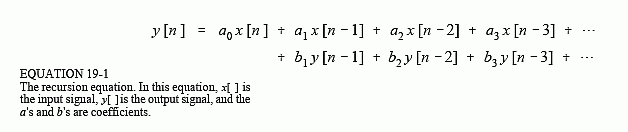
Recursion equation

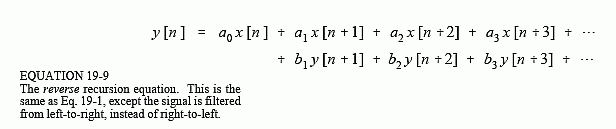
Reverse recursion equation

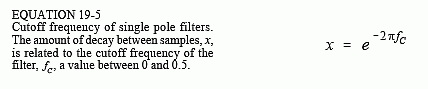
Calculating x from cutoff frequency

# Low-pass Filter

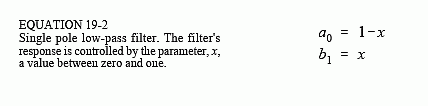
Single pole low-pass filter coefficients

In [3]:
def lopass(wave, fc): # Single pole low-pass filter
    '''wave is the input signal'''
    '''fc is the cutoff frequency in units of the sampling frequency'''
    
    '''initialize output array'''
    filt = np.zeros(len(wave))
    
    '''Calculating values for the variables in the recursion'''
    x = np.exp(-2*np.pi*fc)
    a0 = 1-x
    b1 = x
    
    '''applying the recursive filter. First term uses filt[i-1] = 0 as a filler value.'''
    for i in range(len(wave)):
        filt[i] = a0*wave[i] + b1*filt[i-1]
    return filt

Text(0, 0, '$f_{cutoff} = $  5000Hz')

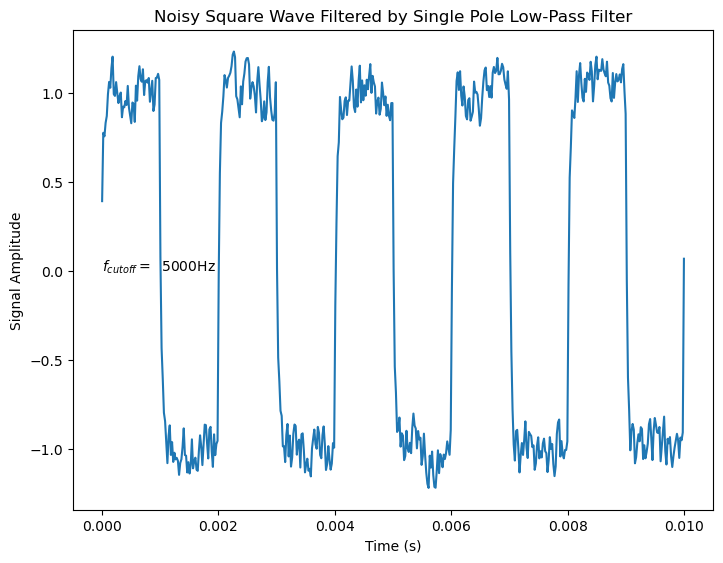

In [71]:
lopafilt = lopass(noisquare, 5000/50000) # cutoff frequency = 1000Hz, comfortably far from 500 and very far from noise freq of 50kHz
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, lopafilt)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Noisy Square Wave Filtered by Single Pole Low-Pass Filter')
ax.text(0, 0, r'$f_{cutoff} = $%6.fHz' % (5000))

Applying a lowpass filter with a cutoff frequency that is too low.

Text(0.004, 0.8, '$f_{cutoff} = $   350Hz')

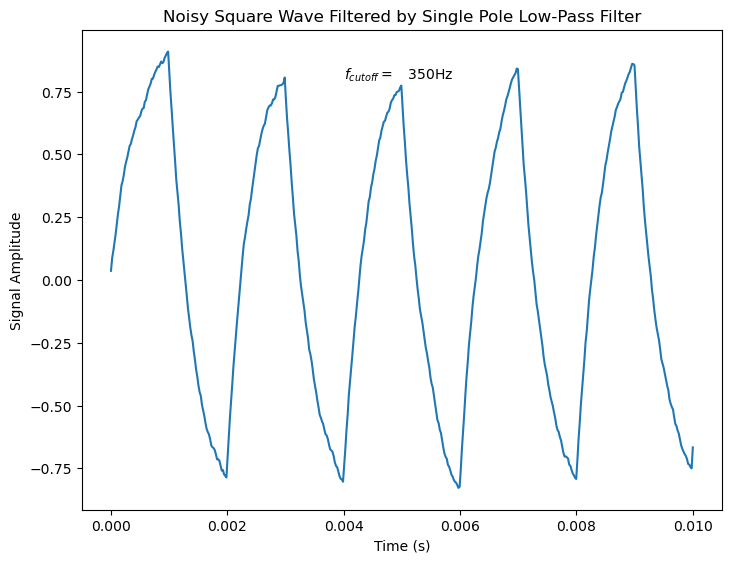

In [73]:
asymlopafilt = lopass(noisquare, 350/50000) # cutoff frequency = 10Hz, comfortably far from 500 and very far from noise freq of 50kHz
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, asymlopafilt)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Noisy Square Wave Filtered by Single Pole Low-Pass Filter')
ax.text(0.004, 0.8, r'$f_{cutoff} = $%6.fHz' % (350))

In [6]:
def reverselopass(wave, fc): # Reverse recursive single pole low-pass filter
    '''wave is the input signal'''
    '''fc is the cutoff frequency in units of the sampling frequency'''
    
    '''initialize output array'''
    filt = np.zeros(len(wave))
    
    '''Calculating values for the variables in the recursion'''
    x = np.exp(-2*np.pi*fc)
    a0 = 1-x
    b1 = x
    
    '''applying the recursive filter. First term uses filt[i-1] = 0 as a filler value.'''
    for i in range(len(wave)):
        if i<len(wave)-1: # this prevents the error of mismatching index lengths ath the end of the calculation
            filt[-i] = a0*wave[-i] + b1*filt[-i+1]
    return filt

Applying single pole low-pass filter in revers to make the plot symmetric.

Text(0.004, 0.43, '$f_{cutoff} = $   350Hz')

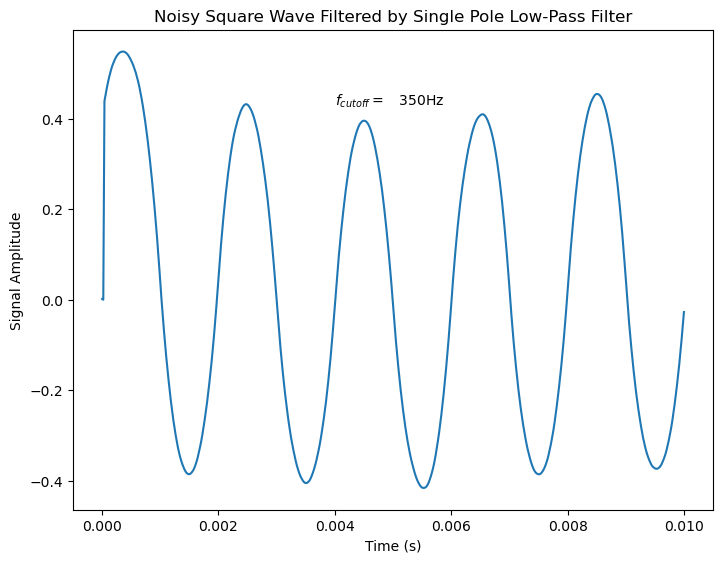

In [72]:
symlopafilt = reverselopass(asymlopafilt, 350/50000) # cutoff frequency = 10Hz, comfortably far from 500 and very far from noise freq of 50kHz
print
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, symlopafilt)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Noisy Square Wave Filtered by Single Pole Low-Pass Filter')
ax.text(0.004, 0.43, r'$f_{cutoff} = $%6.fHz' % (350))

Comparing with last lab's low-pass moving average convolution filter.

In [25]:
# importing the functions
def myconv(list1, list2):
    '''outputs an array with values as far as list2 fits entirely in list1'''
    '''list1 (sample data) must be longer than list2 (convolution data)'''
    convarr = [0]*(len(list1)) # set final array length based on given lists
    i = 0
    for i in range(len(list1)+len(list2)+1):          # sweep through longer list data to store matching index data points into final array
        if i<len(list1):
            j = 0
            for j in range(len(list2)):
                convarr[i] += list1[i-j]*list2[j]
    return convarr

def loMA(size):
    '''size must be an odd integer'''
    impres_lopass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size):
        impres_lopass[i] = 1/size # gives normalized impulse response values
    return impres_lopass

Text(0.5, 1.0, 'Noisy Square Wave')

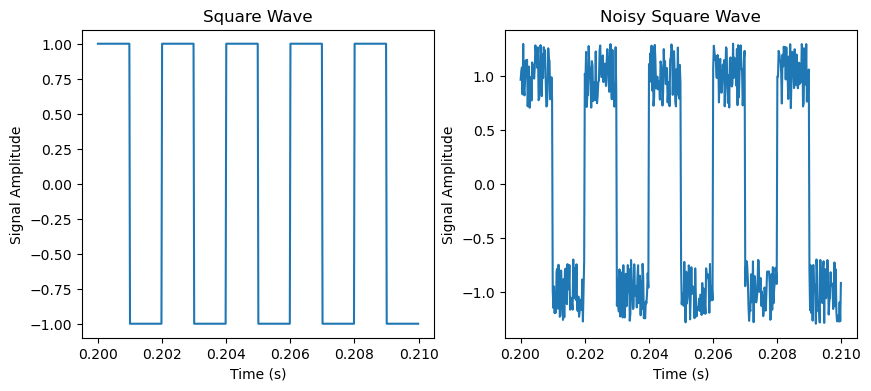

In [56]:
# defining 1 second noisy square wave
longt = np.linspace(0, 1, 50000) # 50000Hz sampling rate = 50k samples per second = 500 samples per 0.01s
longsquare = signal.square(2 * np.pi * 500 * longt)

longnoisquare = longsquare + np.random.uniform(-.3,.3,50000)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(longt[10000:10500],longsquare[10000:10500])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('Square Wave')
ax[1].plot(longt[10000:10500],longnoisquare[10000:10500])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('Noisy Square Wave')

Recursion filter run time: 0.031 s
Convolution filter run time: 0.125 s


Text(0.5, 1.0, 'Convolved Moving Average Filter Results')

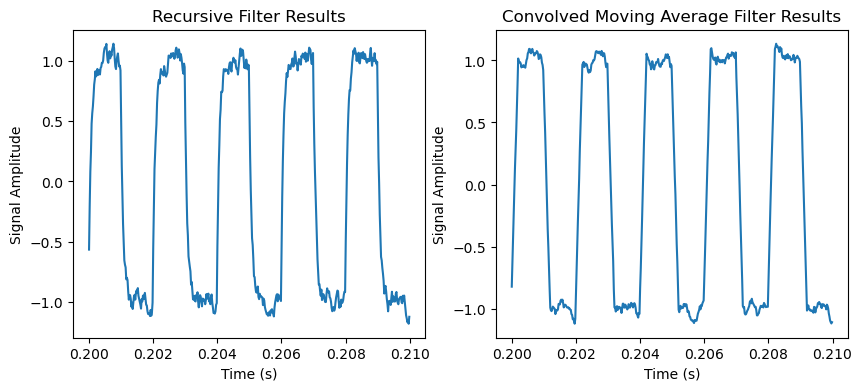

In [89]:
#Recursive filter run
time_start = time.process_time()

loparec = lopass(longnoisquare, 2000/50000)

time_elapsed = (time.process_time()- time_start)
print("Recursion filter run time: %5.3f s" % time_elapsed)


#convolution MA filter run
lomaimpres = loMA(11) # filter length = 10
time_start = time.process_time()
#measure only filtering time
loMAfilt = myconv(longnoisquare, lomaimpres)

time_elapsed = (time.process_time()- time_start)
print("Convolution filter run time: %5.3f s" % time_elapsed)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(longt[10000:10500],loparec[10000:10500])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('Recursive Filter Results')
ax[1].plot(longt[10000:10500],loMAfilt[10000:10500])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('Convolved Moving Average Filter Results')

#### Testing Average Computation Times: Recursed vs Convolved Filter

|Trial #|Recursed Filter Run Time (s)|Convolved Filter Run Time|
|:-:|:-:|:-:|
|1|0.016|0.109|
|2|0.047|0.125|
|3|0.016|0.125|
|4|0.031|0.125|
|5|0.031|0.125|
|6|0.031|0.125|
|7|0.031|0.125|
|8|0.031|0.125|
|Mean|0.02925|0.123|

# High Pass Filter

In [45]:
def hipass(wave, fc): # Single pole high-pass filter
    '''wave is the input signal'''
    '''fc is the cutoff frequency in units of the sampling frequency'''
    
    '''initialize output array'''
    filt = np.zeros(len(wave))
    
    '''Calculating values for the variables in the recursion'''
    x = np.exp(-2*np.pi*fc)
    a0 = (1+x)/2
    a1 = -(1+x)/2
    b1 = x
    
    '''applying the recursive filter. First term uses filt[i-1] = 0 as a filler value.'''
    for i in range(len(wave)):
        filt[i] = a0*wave[i] + a1*wave[i-1] + b1*filt[i-1]
    return filt

Text(0, 0.5, '$f_{cutoff} = $ 10000Hz')

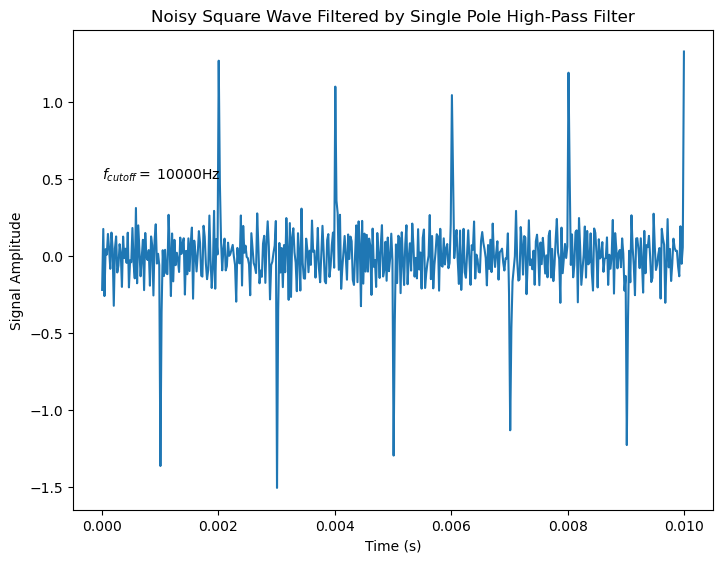

In [80]:
hipafilt = hipass(noisquare, 10000/50000)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, hipafilt)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Noisy Square Wave Filtered by Single Pole High-Pass Filter')
ax.text(0, 0.5, r'$f_{cutoff} = $%6.fHz' % (10000))

Text(0.5, 1.0, 'High Pass Filtered Wave')

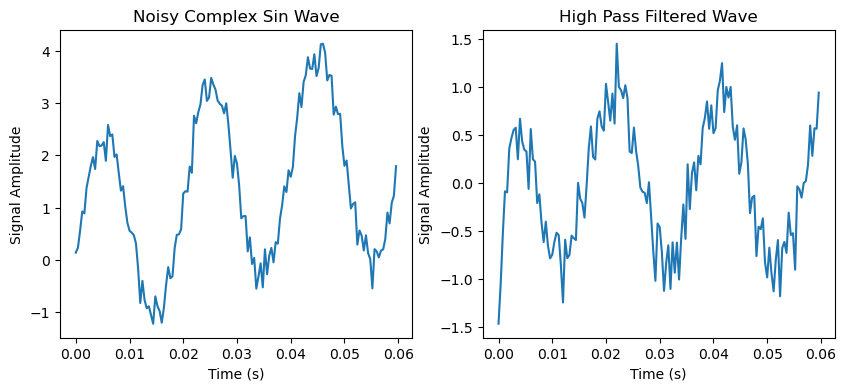

In [99]:
A=2
f=50.0
T=1/f

fs=50*f
Ts=1/fs

cycles=3
t=np.arange(0,cycles*T,Ts)
i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.2*np.pi*f*t[i])+np.random.normal(0,.2)
    i+=1
    
#applying high pass filter
hipafilt = hipass(x, 100/50/50)


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(t,x)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('Noisy Complex Sin Wave')
ax[1].plot(t,hipafilt)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('High Pass Filtered Wave')

The low frequency upward trend in the signal was completely filtered out, and all the peaks have the same amplitude, but some of the sin wave was also filtered, hence the decreased peak height. The noise has a frequency high enough to be mostly ignored, so the signal appears to have a higher noise/signal ratio than before.

# Band-Pass and Band-Reject Filters

In [102]:
import IPython
from scipy.io import wavfile

Text(0.5, 1.0, 'Fourier Transform of CFA Chord')

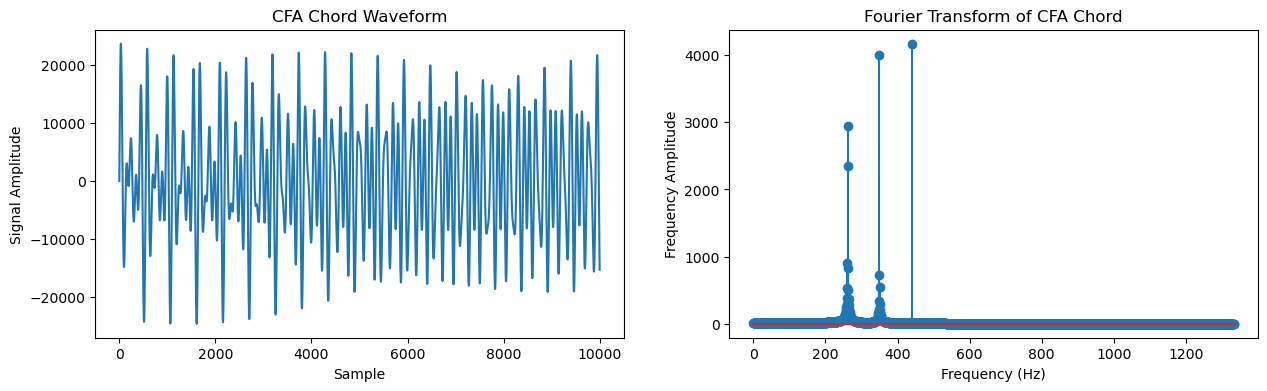

In [112]:
fsamp, CFA = wavfile.read('CFA Chord.wav')

fftCFA = np.fft.fft(CFA)
N = len(CFA)
freqs = np.linspace(0, 48000, N)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
ax[0].plot(CFA[:10000])
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('CFA Chord Waveform')
ax[1].stem(freqs[:2000],abs(fftCFA[:2000])/N)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency Amplitude')
ax[1].set_title('Fourier Transform of CFA Chord')

## Defining Filter Functions

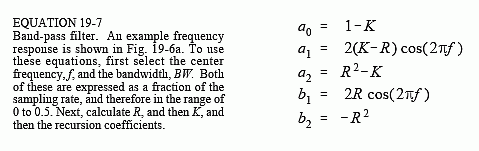
Band-Pass filter coefficients
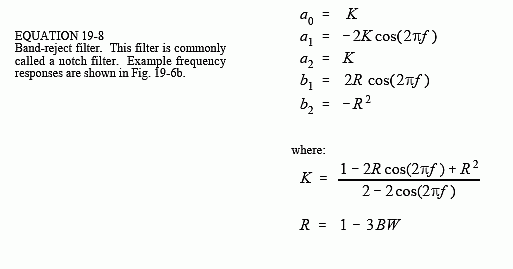
Band-Reject filter coefficients, K and R formulas

In [115]:
def bandpass(wave, fcentre, BW):
    '''wave is the input signal'''
    '''fcentre is the centre frequency of the bandwidth being passed, in units of the sampling frequency'''
    '''BW is the bandwidth of the filter, also in units of the sampling frequency'''
    
    '''initialize output array'''
    filt = np.zeros(len(wave))
    
    '''Calculating values for the variables in the recursion'''
    R = 1 - 3*BW
    K = (1 - 2*R*np.cos(2*np.pi*fcentre) + R**2)/(2 - 2*np.cos(2*np.pi*fcentre))
    
    a0 = 1-K
    a1 = 2*(K-R)*np.cos(2*np.pi*fcentre)
    a2 = R**2 - K
    b1 = 2*R*np.cos(2*np.pi*fcentre)
    b2 = -R**2
    
    '''applying the recursive filter. First term uses filt[i-1] = 0 as a filler value.'''
    for i in range(len(wave)):
        filt[i] = a0*wave[i] + a1*wave[i-1] + a2*wave[i-2] + b1*filt[i-1] + b2*filt[i-2]
    return filt

def bandreject(wave, fcentre, BW):
    '''wave is the input signal'''
    '''fcentre is the centre frequency of the bandwidth being rejected, in units of the sampling frequency'''
    '''BW is the bandwidth of the filter, also in units of the sampling frequency'''
    
    '''initialize output array'''
    filt = np.zeros(len(wave))
    
    '''Calculating values for the variables in the recursion'''
    R = 1 - 3*BW
    K = (1 - 2*R*np.cos(2*np.pi*fcentre) + R**2)/(2 - 2*np.cos(2*np.pi*fcentre))
    
    a0 = K
    a1 = -2*K*np.cos(2*np.pi*fcentre)
    a2 = K
    b1 = 2*R*np.cos(2*np.pi*fcentre)
    b2 = -R**2
    
    '''applying the recursive filter. First term uses filt[i-1] = 0 as a filler value.'''
    for i in range(len(wave)):
        filt[i] = a0*wave[i] + a1*wave[i-1] + a2*wave[i-2] + b1*filt[i-1] + b2*filt[i-2]
    return filt

Text(600, 2000, '$f_{centre} =$ 440.000Hz   bandwidth = 5Hz')

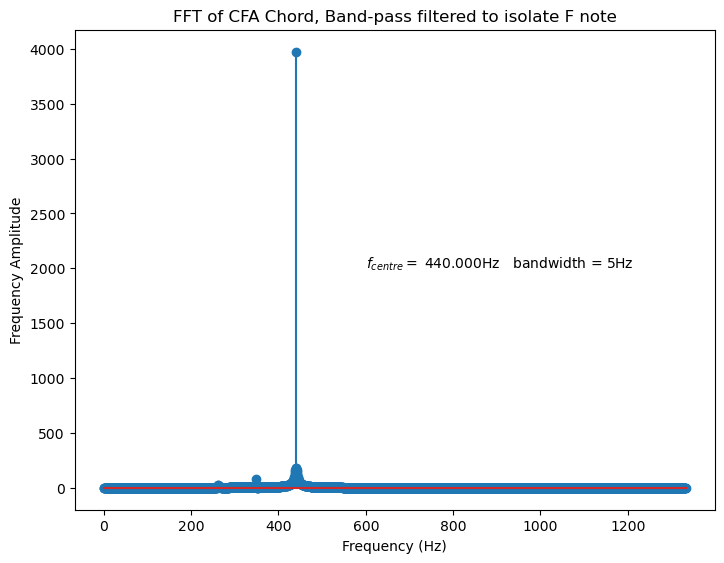

In [134]:
Apass = bandpass(CFA, 440/48000, 5/50000)

fftApass = np.fft.fft(Apass)
N = len(Apass)
freqs = np.linspace(0, 48000, N)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.stem(freqs[:2000],abs(fftApass[:2000])/N)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Frequency Amplitude')
ax.set_title('FFT of CFA Chord, Band-pass filtered to isolate A note')
plt.text(600, 2000, r'$f_{centre} =$ %3.3fHz   bandwidth =%2.fHz' % (440, 5))


Text(600, 2000, '$f_{centre} =$ 440.000Hz   bandwidth = 5Hz')

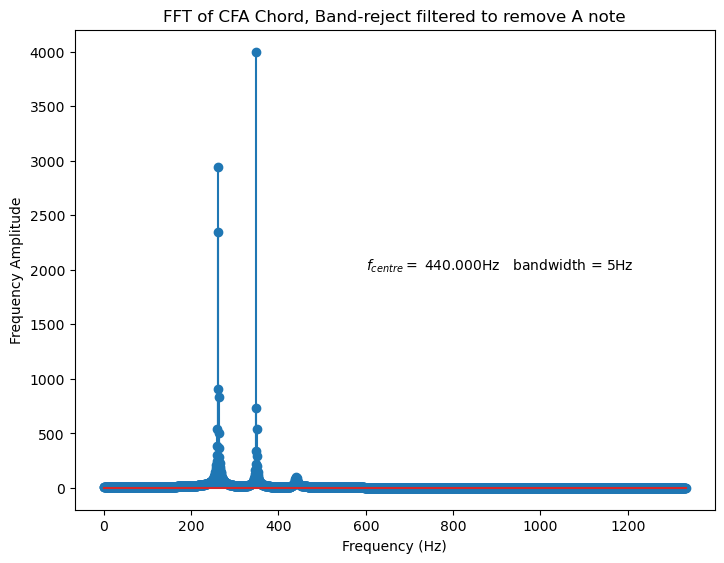

In [135]:
Areject = bandreject(CFA, 440/48000, 5/50000)

fftAreject = np.fft.fft(Areject)
N = len(Areject)
freqs = np.linspace(0, 48000, N)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.stem(freqs[:2000],abs(fftAreject[:2000])/N)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Frequency Amplitude')
ax.set_title('FFT of CFA Chord, Band-reject filtered to remove A note')
plt.text(600, 2000, r'$f_{centre} =$ %3.3fHz   bandwidth =%2.fHz' % (440, 5))
